In [1]:
#! pip install kaggle
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json


The Following Code Explores Various Models and Effective Vizualisations That are Easy to Understand


The Best Mean Squared Error (MSE) Numeric Obtained By a Few Models was: **0.0641** and an Accuray of About **80%**

Concepts Like **VIF** and **PCA** have been used to transform the dataset, Vizualizations Include **Scatter Plots** and **Hist Plots**

Models are Subject to Betterment with Stringent Hyper parameter tuning, Like using **GridSearchCV** to Run through multiple combinations of potential hyperparameters

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error


In [3]:
#! kaggle datasets download -d mohansacharya/graduate-admissions

In [4]:
#! unzip graduate-admissions.zip

In [5]:
df=pd.read_csv('../input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
df.drop('Serial No.', axis='columns', inplace=True) # Since this column is irrelevant to our model

In [7]:
def describe(df):                        # Function to explore major elements in a Dataset
                                         # Will help to find null values present and deal with them
  columns=df.columns.to_list()           # Function will help to directly find numerical and categorical columns
  ncol=df.describe().columns.to_list()
  ccol=[]
  for i in columns:
    if(ncol.count(i)==0):
      ccol.append(i)
    else:
      continue
  print('Name of all columns in the dataframe:')
  print(columns)
  print('')
  print('Number of columns in the dataframe:')
  print(len(columns))
  print('')
  print('Name of all numerical columns in the dataframe:')
  print(ncol)
  print('')
  print('Number of numerical columns in the dataframe:')
  print(len(ncol))
  print('')
  print('Name of all categorical columns in the dataframe:')
  print(ccol)
  print('')
  print('Number of categorical columns in the dataframe:')
  print(len(ccol))
  print('')
  print('------------------------------------------------------------------------------------------------')
  print('')
  print('Number of Null Values in Each Column:')
  print('')
  print(df.isnull().sum())
  print('')
  print('')
  print('Number of Unique Values in Each Column:')
  print('')
  print(df.nunique())
  print('')
  print('')
  print('Basic Statistics and Measures for Numerical Columns:')
  print('')
  print(df.describe().T)
  print('')
  print('')
  print('Other Relevant Metadata Regarding the Dataframe:')
  print('')
  print(df.info())
  print('')
  print('')

In [8]:
import warnings
warnings.filterwarnings("ignore")
# We are creating 3 categories for better vizualisation
# Split was chosen after Personal research and is subject to change 

df['Admit Possibility']=0
for i in range(0,len(df)):
  if(df['Chance of Admit '][i]>0.80):
    df['Admit Possibility'][i]='High'
  elif(df['Chance of Admit '][i]<0.60):
    df['Admit Possibility'][i]='Low'
  else:
    df['Admit Possibility'][i]='Fair'

    


In [9]:
describe(df)

Name of all columns in the dataframe:
['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'Admit Possibility']

Number of columns in the dataframe:
9

Name of all numerical columns in the dataframe:
['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Number of numerical columns in the dataframe:
8

Name of all categorical columns in the dataframe:
['Admit Possibility']

Number of categorical columns in the dataframe:
1

------------------------------------------------------------------------------------------------

Number of Null Values in Each Column:

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
Admit Possibility    0
dtype: int64


Number of Unique Values in Each Column:

GRE Score             49
TOEFL Score           29
University Rating  

<AxesSubplot:xlabel='LOR ', ylabel='Count'>

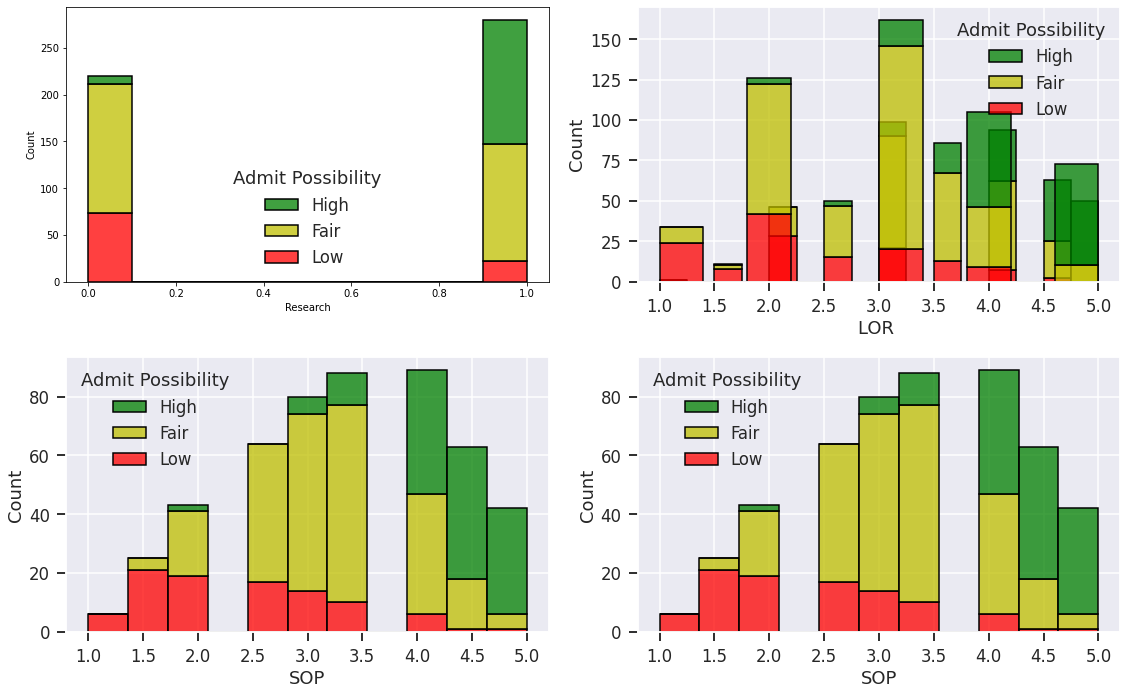

In [10]:
fig = plt.figure(figsize=(16,10))
oe=['g','y','r']
plt.subplot(2,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Research", hue="Admit Possibility",multiple="stack",palette=oe)

plt.subplot(2,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="LOR ", hue="Admit Possibility",multiple="stack",palette=oe)

plt.subplot(2,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="SOP", hue="Admit Possibility",multiple="stack",palette=oe)

plt.subplot(2,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="SOP", hue="Admit Possibility",multiple="stack",palette=oe)

plt.subplot(2,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="University Rating", hue="Admit Possibility",multiple="stack",palette=oe)




<Figure size 576x396 with 0 Axes>

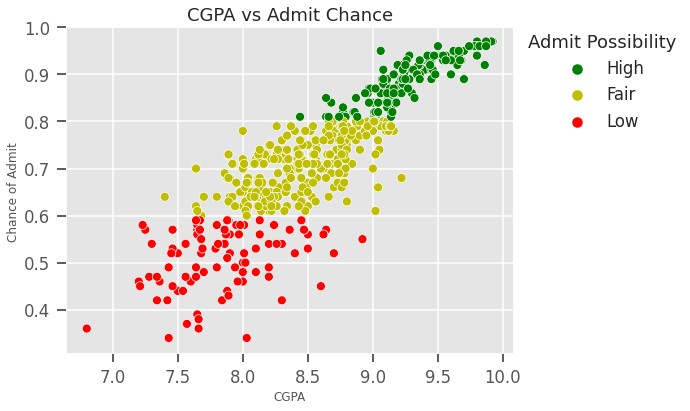

In [11]:
oe=['g','y','r']
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_context('talk')
plt.title('CGPA vs Admit Chance')
sns.scatterplot( x="CGPA",y='Chance of Admit ', hue="Admit Possibility",data=df,palette=oe)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Admit Possibility')

<Figure size 576x396 with 0 Axes>

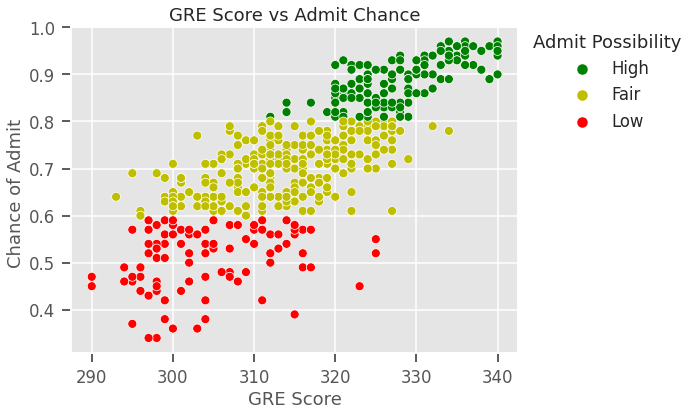

In [12]:
oe=['g','y','r']
plt.tight_layout()
fig, ax = plt.subplots(figsize=(8, 6))
style.use('ggplot')
sns.set_context('talk')
plt.title('GRE Score vs Admit Chance')
sns.scatterplot(x="GRE Score", y="Chance of Admit ", hue="Admit Possibility", data=df, palette=oe)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Admit Possibility')

<Figure size 576x396 with 0 Axes>

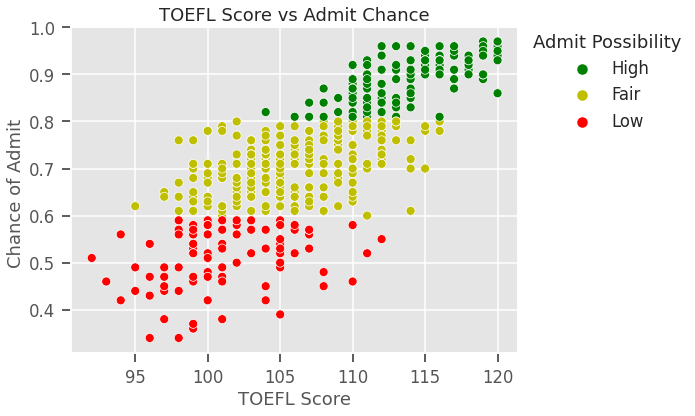

In [13]:
oe=['g','y','r']
plt.tight_layout()
fig, ax = plt.subplots(figsize=(8, 6))
style.use('ggplot')
sns.set_context('talk')
plt.title('TOEFL Score vs Admit Chance')
sns.scatterplot(x="TOEFL Score", y="Chance of Admit ", hue="Admit Possibility", data=df, palette=oe)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Admit Possibility')

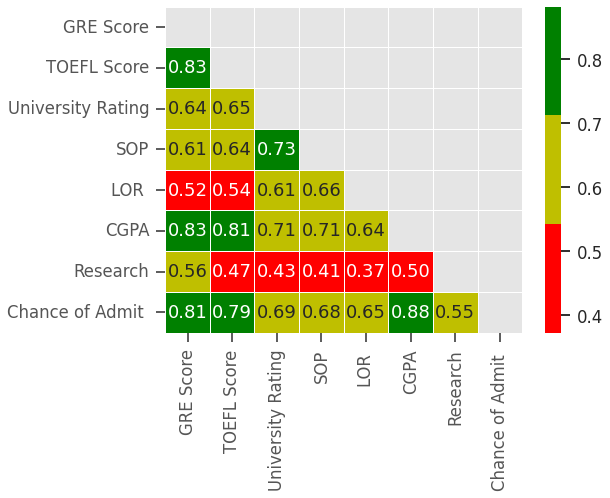

In [14]:
# Heat Map : To find out correlation among all variables (i.e. dependent and independent)

corr = df.corr()
oe=['r','y','g']
fig, ax = plt.subplots(figsize=(8, 6))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.set_style("white")
sns.heatmap(corr, cmap=oe, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [15]:
def outliers(df_column):
  q75, q25 = np.percentile(df_column, [75 ,25]) 
  iqr = q75 - q25
  print('q75: ',q75)
  print('q25: ',q25)
  print('Inter Quartile Range: ',round(iqr,2))
  print('Outliers lie before', q25-1.8*iqr, 'and beyond', q75+1.8*iqr) 

  # Usually 1.5 times IQR is considered, but we have used 1.8 for broader range since datapoints are very less

  print('Number of Rows with Left Extreme Outliers:', len(df[df_column <q25-1.8*iqr]))
  print('Number of Rows with Right Extreme Outliers:', len(df[df_column>q75+1.8*iqr]))
  plt.tight_layout()
  plt.style.use('seaborn')
  sns.set_context('notebook')
  sns.histplot(data=df, x=df_column, hue="Admit Possibility",multiple="stack",palette=oe)
  print('')
  

  

q75:  325.0
q25:  308.0
Inter Quartile Range:  17.0
Outliers lie before 277.4 and beyond 355.6
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0



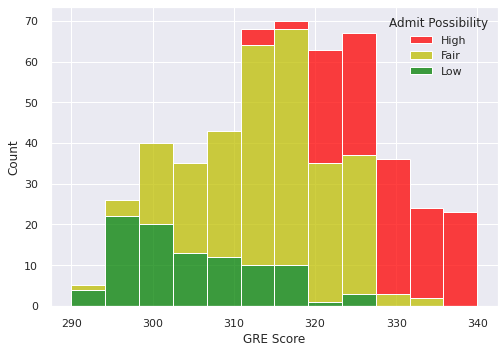

In [16]:
outliers(df['GRE Score'])

q75:  112.0
q25:  103.0
Inter Quartile Range:  9.0
Outliers lie before 86.8 and beyond 128.2
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0



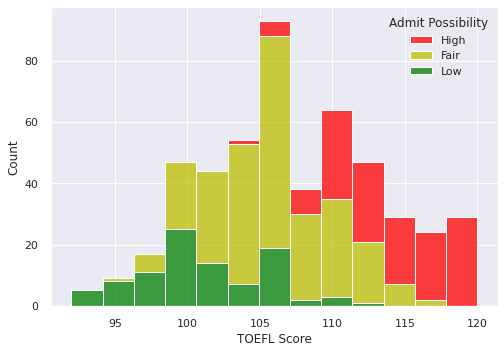

In [17]:
outliers(df['TOEFL Score'])

q75:  9.04
q25:  8.1275
Inter Quartile Range:  0.91
Outliers lie before 6.485 and beyond 10.6825
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0



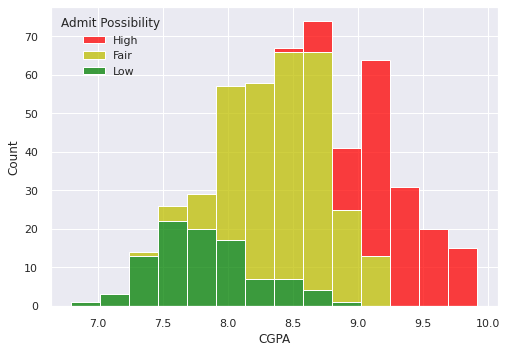

In [18]:
outliers(df['CGPA'])

q75:  4.0
q25:  3.0
Inter Quartile Range:  1.0
Outliers lie before 1.2 and beyond 5.8
Number of Rows with Left Extreme Outliers: 1
Number of Rows with Right Extreme Outliers: 0



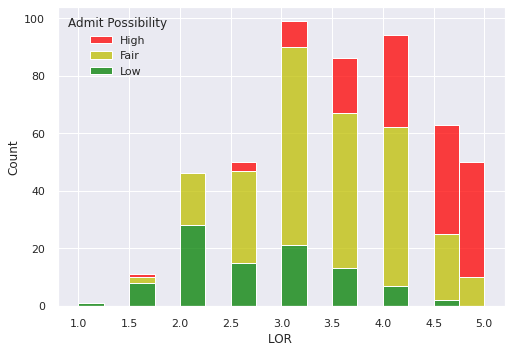

In [19]:
outliers(df['LOR '])

q75:  4.0
q25:  2.5
Inter Quartile Range:  1.5
Outliers lie before -0.20000000000000018 and beyond 6.7
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0



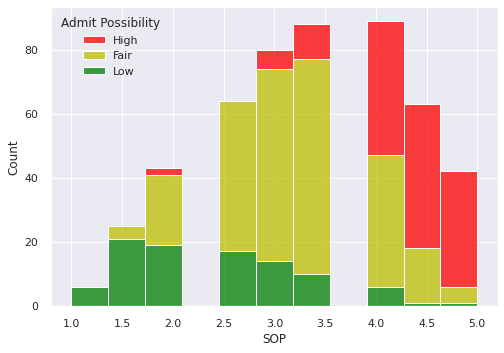

In [20]:
outliers(df['SOP'])

q75:  1.0
q25:  0.0
Inter Quartile Range:  1.0
Outliers lie before -1.8 and beyond 2.8
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0



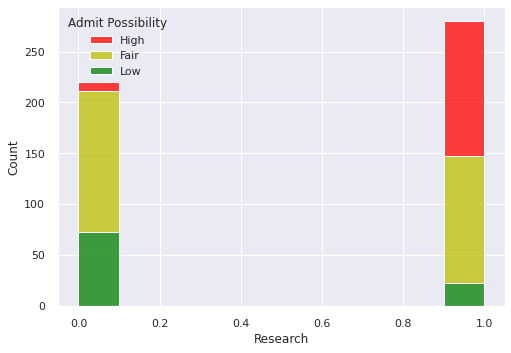

In [21]:
outliers(df['Research'])

q75:  4.0
q25:  2.0
Inter Quartile Range:  2.0
Outliers lie before -1.6 and beyond 7.6
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0



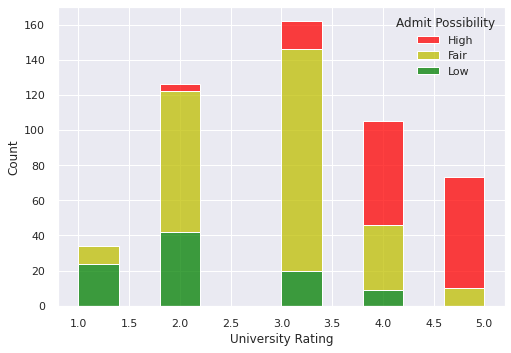

In [22]:
outliers(df['University Rating'])

In [23]:
# Find VIF (Variance Inflation Factor) To Check for collinearity among independent variables
# We dropped TOEFL Score becaue it was Highly Correlated to GRE Score with a VIF Value > 1000
vif = df.copy()
vif.drop(columns=['Chance of Admit ','Admit Possibility','TOEFL Score'],axis=1,inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = vif.columns
vif_data["VIF"] = [variance_inflation_factor(vif.values, i)
                          for i in range(len(vif.columns))]

In [24]:
vif_data

,feature,VIF
0,GRE Score,688.202779
1,University Rating,20.714403
2,SOP,34.889209
3,LOR,30.911211
4,CGPA,870.114787
5,Research,2.866879


In [25]:
# Scale Data For Higher Efficiency
from sklearn.preprocessing import StandardScaler # Converts Columnar Data into Standard Normal Distribution
scaler=StandardScaler()
scaler.fit(vif)
scaled_data=scaler.transform(vif)
scaled_data

array([[ 1.81923762,  0.77558214,  1.13735981,  1.09894429,  1.77680627,
         0.88640526],
       [ 0.66714832,  0.77558214,  0.63231549,  1.09894429,  0.48585943,
         0.88640526],
       [-0.0418297 , -0.09979274, -0.37777315,  0.01730621, -0.95404281,
         0.88640526],
       ...,
       [ 1.19888185,  1.65095702,  1.13735981,  1.63976333,  1.62785086,
         0.88640526],
       [-0.39631872,  0.77558214,  0.63231549,  1.63976333, -0.24236699,
        -1.12815215],
       [ 0.93301508,  0.77558214,  1.13735981,  1.09894429,  0.76721964,
        -1.12815215]])

In [26]:
from sklearn.decomposition import PCA # Reduce Dimensions by Principal Component Analysis To Compensate for Variables with High VIF
pca=PCA(n_components=3)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca

array([[-3.10298704,  0.25925937, -0.47427799],
       [-1.81252466,  0.10704767,  0.54670086],
       [ 0.36096121,  0.8252362 ,  0.76850192],
       ...,
       [-3.3507455 , -0.29933712,  0.15138395],
       [-0.59323858, -1.99664182,  0.75699067],
       [-1.62201784, -1.59868333, -0.58194634]])

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Chance of Admit '], test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(x_train, y_train)
print('Test Accuracy of Linear Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Linear Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of Linear Regression:  79.63 %

Train Accuracy of Linear Regression: 78.59 %

Mean Squared Error (MSE):  0.0645


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Chance of Admit '], test_size=0.2, random_state=42)
reg=Lasso(alpha=0.005)
reg.fit(x_train, y_train)
print('Test Accuracy of Lasso Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Lasso Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of Lasso Regression:  79.91 %

Train Accuracy of Lasso Regression: 78.12 %

Mean Squared Error (MSE):  0.0641


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Chance of Admit '], test_size=0.2, random_state=42)
reg=Ridge(alpha=0.01)
reg.fit(x_train, y_train)
print('Test Accuracy of Ridge Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Ridge Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of Ridge Regression:  79.63 %

Train Accuracy of Ridge Regression: 78.59 %

Mean Squared Error (MSE):  0.0645


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Chance of Admit '], test_size=0.2, random_state=42)
reg=ElasticNet(alpha=0.005)
reg.fit(x_train, y_train)
print('Test Accuracy of ElacticNet Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of ElacticNet Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of ElacticNet Regression:  79.89 %

Train Accuracy of ElacticNet Regression: 78.47 %

Mean Squared Error (MSE):  0.0641


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Chance of Admit '], test_size=0.2, random_state=42)
reg = RandomForestRegressor(random_state=42)
reg.fit(x_train, y_train)
print('Test Accuracy of Random Forest Regressor Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Random Forest Regressor Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of Random Forest Regressor Regression:  78.55 %

Train Accuracy of Random Forest Regressor Regression: 96.14 %

Mean Squared Error (MSE):  0.0662


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Chance of Admit '], test_size=0.2, random_state=42)
import tensorflow as tf
tf.random.set_seed(0)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[]
)

history = model.fit(x_train, y_train, epochs=100)
y_pred=model.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.6041
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5523
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5498
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5477
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5473
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5469
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5469
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5467
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5467
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5470
Epoch 11/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5472
Epoch 12/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5468
Epoch 13/100
13/13 [=================